In [28]:
! pip install kaggle

In [29]:
! mkdir ~/.kaggle

mkdir: /Users/rd/.kaggle: File exists


In [30]:
! cp kaggle.json ~/.kaggle/

In [31]:
! chmod 600 ~/.kaggle/kaggle.json

In [32]:
! kaggle competitions download anomaly-detection

anomaly-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [33]:
! unzip anomaly-detection.zip

Archive:  anomaly-detection.zip
replace Submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('train.csv')
df

,timestamp,value,is_anomaly,predicted
0,1425008573,42,False,44.072500
1,1425008873,41,False,50.709390
2,1425009173,41,False,81.405120
3,1425009473,61,False,39.950367
4,1425009773,44,False,35.350160
...,...,...,...,...
15825,1429756073,44,False,53.624115
15826,1429756373,45,False,59.752296
15827,1429756673,48,False,52.147630
15828,1429756973,26,False,58.007545


<Axes: xlabel='value', ylabel='predicted'>

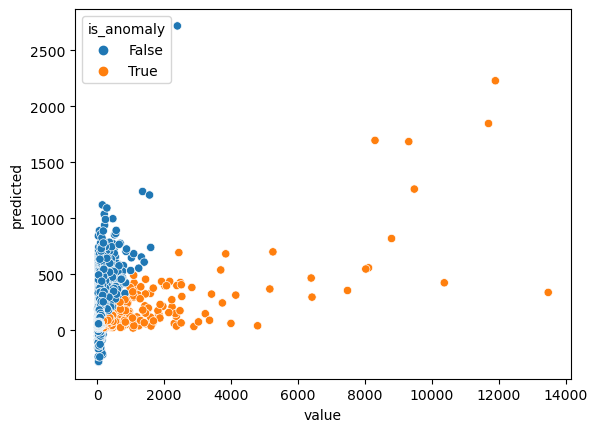

In [151]:
sns.scatterplot(data=df, x= 'value', y='predicted', hue='is_anomaly')

In [8]:
#count the number of cases in each class
df.loc[df['is_anomaly']==True]

,timestamp,value,is_anomaly,predicted
22,1425015173,73,True,31.362171
25,1425016073,140,True,65.324310
83,1425033473,32,True,13.747632
93,1425036473,41,True,14.762168
123,1425045473,222,True,38.035175
...,...,...,...,...
15465,1429648073,1299,True,388.840450
15748,1429732973,257,True,78.772026
15749,1429733273,838,True,74.221030
15752,1429734173,317,True,90.181310


Here we can see the class is imbalanced since there are lesser cases of anomalies.
So, we need to make this classes balanced before training this model.
First, let's check the percentage of each 'True' or 'False' classes.

In [9]:
#count the number of cases in each class
total_pos=df['is_anomaly'].value_counts()[True]
total_neg=df['is_anomaly'].value_counts()[False]
scale_pos_weight = total_neg/total_pos
scale_pos_weight

19.399484536082475

In [10]:
#Highest value of business metric in the training dataset
df['value'].max()

13479

In [11]:
#Checking the timestamp unit
df['timestamp'].dtype

dtype('int64')

In [12]:
#Converting the datetime from integer to datetime unit
df['datetime']=pd.to_datetime(df['timestamp'], unit='s')
df

,timestamp,value,is_anomaly,predicted,datetime
0,1425008573,42,False,44.072500,2015-02-27 03:42:53
1,1425008873,41,False,50.709390,2015-02-27 03:47:53
2,1425009173,41,False,81.405120,2015-02-27 03:52:53
3,1425009473,61,False,39.950367,2015-02-27 03:57:53
4,1425009773,44,False,35.350160,2015-02-27 04:02:53
...,...,...,...,...,...
15825,1429756073,44,False,53.624115,2015-04-23 02:27:53
15826,1429756373,45,False,59.752296,2015-04-23 02:32:53
15827,1429756673,48,False,52.147630,2015-04-23 02:37:53
15828,1429756973,26,False,58.007545,2015-04-23 02:42:53


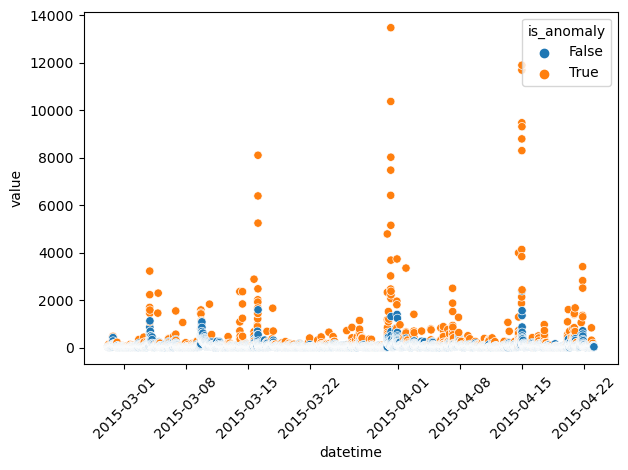

In [146]:
sns.scatterplot(data = df, x='datetime', y = 'value', hue='is_anomaly')
# Adjust x-axis labels to prevent overlapping
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.tight_layout()

In [13]:
df['hour']=df['datetime'].apply(lambda x: x.hour)
df['day_of_week'] = df['datetime'].apply(lambda x: x.weekday())
df

,timestamp,value,is_anomaly,predicted,datetime,hour,day_of_week
0,1425008573,42,False,44.072500,2015-02-27 03:42:53,3,4
1,1425008873,41,False,50.709390,2015-02-27 03:47:53,3,4
2,1425009173,41,False,81.405120,2015-02-27 03:52:53,3,4
3,1425009473,61,False,39.950367,2015-02-27 03:57:53,3,4
4,1425009773,44,False,35.350160,2015-02-27 04:02:53,4,4
...,...,...,...,...,...,...,...
15825,1429756073,44,False,53.624115,2015-04-23 02:27:53,2,3
15826,1429756373,45,False,59.752296,2015-04-23 02:32:53,2,3
15827,1429756673,48,False,52.147630,2015-04-23 02:37:53,2,3
15828,1429756973,26,False,58.007545,2015-04-23 02:42:53,2,3


In [14]:
#Doing the above operations on the test dataset
df_test=pd.read_csv('test.csv')
df_test['datetime']=pd.to_datetime(df_test['timestamp'], unit = 's')
df_test['hour']=df_test['datetime'].apply(lambda x: x.hour)
df_test['day_of_week']=df_test['datetime'].apply(lambda x: x.weekday())
df_test

,timestamp,value,predicted,datetime,hour,day_of_week
0,1396332000,20.00000,20.000000,2014-04-01 06:00:00,6,1
1,1396332300,20.00000,20.000000,2014-04-01 06:05:00,6,1
2,1396332600,20.00000,20.000000,2014-04-01 06:10:00,6,1
3,1396332900,20.00000,20.000000,2014-04-01 06:15:00,6,1
4,1396333200,20.00000,20.000000,2014-04-01 06:20:00,6,1
...,...,...,...,...,...,...
3955,1397518500,20.00384,19.836240,2014-04-14 23:35:00,23,0
3956,1397518800,20.00384,19.207998,2014-04-14 23:40:00,23,0
3957,1397519100,20.00384,20.103437,2014-04-14 23:45:00,23,0
3958,1397519400,20.00384,19.346764,2014-04-14 23:50:00,23,0


In [15]:
#Highest value of business metric in the testing dataset
df_test['value'].max()

79.99996928

Now let's build a model to identify the anomalies in this dataset.

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline

First for reference, I will train a model without dealing with the class imbalance

In [90]:
class classifier:
    def __init__(self, X, y):
        self.X=X
        self.y=y
        self.pipeline= Pipeline([('scaler', StandardScaler()), ('classifier', XGBClassifier())])
        self.param_grid = {'classifier__n_estimators': [100, 200, 300], 'classifier__max_depth': [3, 5, 7], 'classifier__eta': [0.1, 0.5]}
        self.grid_search = GridSearchCV(self.pipeline, param_grid=self.param_grid, cv=5, scoring='f1')
    
    def fit_transform(self):
        return self.pipeline.fit_transform(self.X, self.y)
    
    def fit(self):
        self.grid_search.fit(self.X, self.y)
        self.pipeline = self.grid_search.best_estimator_
        return self.pipeline
    
    def transform(self, X_test):
        return self.pipeline.transform(X_test)
    
    def cross_val_score(self):
        score = cross_val_score(self.pipeline, self.X, self.y, cv=5, scoring='f1')
        return score
    
    def predict(self, X_test, threshold=0.5):
        proba = self.pipeline.predict_proba(X_test)[:,1]
        return (proba>threshold).astype(int)
    
X=df[['hour', 'day_of_week', 'timestamp', 'value', 'predicted']]
y=df[['is_anomaly']]
X_train1,X_test1,train_label1,test_label1=train_test_split(X,y,test_size=0.1,random_state=0)
classify = classifier(X_train1, train_label1)
classify.fit()


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eta=0.5,
                               eval_metric=None, feature_types=None, gamma=None,
                               gpu_id=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=300,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, ...))])

In [91]:
classify.grid_search.best_params_

{'classifier__eta': 0.5,
 'classifier__max_depth': 7,
 'classifier__n_estimators': 300}

In [92]:
np.mean(classify.cross_val_score())

0.7544462368009335

The above cell calculates the average F1 score across all folds of the cross-validation. It provides you with an estimate of how well the classifier performs on average across different validation sets. This can help you assess the generalization performance of your model and its ability to handle different variations in the data.

In order to understand the model's performance, we can build a <span style="color: blue;">**confusion matrix**</span>. It helps vizualize the performance of the model by showing the counts of true positive, true negative, false positive and false negative predictions. These values are crucial for understanding the accuracy, precision, recall and finally the F1-score of the model.

In [93]:
y_pred = classify.predict(X_test1)
y_int = test_label1.astype(int)
confusion_matrix(y_int, y_pred, labels=[1, 0])

array([[  50,   30],
       [   9, 1494]])

While accuracy can be an important metric for the model's performance, in this case it is not the most important metric to determine the model's performance due to imbalanced dataset containing more normal data than anomalies. More importantly, the company is more focussed on finding the anomalies in real time since they are more like going to affect the business revenue. In order to solve that, we need to look at the precision and recall.

<span style="color: blue;">**Precision**</span> refers to the ratio of the true positives to the total number of positive predictions.

<span style="color: blue;">**Recall**</span> refers to the sensitivity of the model and defined by the ratio of the true positives and the actual positives in the dataset. 

In [67]:
# Assuming y_true contains the true labels and y_pred contains the predicted labels
tn, fp, fn, tp = confusion_matrix(y_int, y_pred).ravel()

recall = tp / (tp + fn)
print("Recall:", recall)

Recall: 0.625


In [44]:
print("f1 score:", f1_score(y_int, y_pred))

f1 score: 0.7194244604316545


In [84]:
x_test2

,hour,day_of_week,timestamp,value,predicted
3970,22,3,1426199573,75,38.887226
12210,13,4,1428671573,45,58.825780
11311,10,1,1428401873,51,74.766990
654,10,6,1425204773,16,12.345747
9763,1,3,1427937473,169,85.298805
...,...,...,...,...,...
14987,4,0,1429504673,31,38.933437
2095,10,4,1425637073,15,12.517103
11789,2,3,1428545273,65,85.008286
6525,19,5,1426966073,32,33.237530


<span style="color: blue;">**Random Over-Sampling**</span> 

This technique is used here to address imbalance in our dataset where there are more normal cases than anomaly cases.

This techinque randomly select sample from the minority class (in this case the anomaly cases) and duplicating them to balance class distribution.

In [94]:
#Random Oversampler

class classifier3:
  def __init__(self, X, y):
    self.X=X
    self.y=y
    self.RandomOverSampler = RandomOverSampler(sampling_strategy='minority')
    self.scaler = StandardScaler()
    self.classifier = XGBClassifier()
    self.pipeline = ImbPipeline([('RandomOverSampler', self.RandomOverSampler), ('scaler', self.scaler), ('classifier', self.classifier)])
    # self.pipeline= Pipeline([('scaler', StandardScaler()), ('classifier', XGBClassifier())])
    self.param_grid={'classifier__n_estimators':[100, 200, 300, 500], 'classifier__max_depth':[3,5,7], 'classifier__eta':[0.1, 0.5]}
    self.grid_search = RandomizedSearchCV(self.pipeline, param_distributions=self.param_grid, n_iter=10, cv=5, scoring='f1')

  def fit_transform(self):
      return self.pipeline.fit_transform(self.X, self.y)
  def fit(self):
    self.grid_search.fit(self.X, self.y)
    self.pipeline=self.grid_search.best_estimator_
    return self.pipeline

  def transform(self, X_test):
    return self.pipeline.transform(X_test)
  def cross_val_score(self):
    score = cross_val_score(self.pipeline, self.X, self.y, cv=5, scoring='f1')
    return score
  def predict(self, X_test, threshold=0.5):
    proba= self.pipeline.predict_proba(X_test)[:,1]
    return (proba>threshold).astype(int)

X=df[['hour', 'day_of_week', 'timestamp', 'value', 'predicted']]
y=df[['is_anomaly']]
x_train1,x_test1,train_label,test_label=train_test_split(X,y,test_size=0.1,random_state=0)
classify3=classifier3(x_train1, train_label)
classify3.fit()

Pipeline(steps=[('RandomOverSampler',
                 RandomOverSampler(sampling_strategy='minority')),
                ('scaler', StandardScaler()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eta=0.5,
                               eval_metric=None, feature_types=None, gamma=None,
                               gpu_id=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=300,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, ...))])

In [95]:
classify3.grid_search.best_params_

{'classifier__n_estimators': 300,
 'classifier__max_depth': 7,
 'classifier__eta': 0.5}

In [96]:
np.mean(classify3.cross_val_score())

0.7459208633720547

In [97]:
y_pred = classify3.predict(x_test1)
y_int = test_label.astype(int)
y_int

,is_anomaly
3970,1
12210,0
11311,0
654,0
9763,1
...,...
14987,0
2095,0
11789,0
6525,0


In [98]:
x_test1

,hour,day_of_week,timestamp,value,predicted
3970,22,3,1426199573,75,38.887226
12210,13,4,1428671573,45,58.825780
11311,10,1,1428401873,51,74.766990
654,10,6,1425204773,16,12.345747
9763,1,3,1427937473,169,85.298805
...,...,...,...,...,...
14987,4,0,1429504673,31,38.933437
2095,10,4,1425637073,15,12.517103
11789,2,3,1428545273,65,85.008286
6525,19,5,1426966073,32,33.237530


In [99]:
y_int[y_int['is_anomaly']==1]

,is_anomaly
3970,1
9763,1
6612,1
3023,1
14311,1
...,...
3030,1
6472,1
8580,1
11673,1


In [100]:
np.count_nonzero(y_pred==1)

64

In [101]:
# Assuming y_true contains the true labels and y_pred contains the predicted labels
tn, fp, fn, tp = confusion_matrix(y_int, y_pred).ravel()

recall = tp / (tp + fn)
print("Recall:", recall)
confusion_matrix(y_int, y_pred, labels=[1, 0])

Recall: 0.6875


array([[  55,   25],
       [   9, 1494]])

In [102]:
f1_score(y_int, y_pred)

0.7638888888888888

Here, the true positive (TP) count is 59, false positive (FP) count is 21, false negative (FN) count is 20 and true negative is 1483. Here the positive cases denotes the anomaly.

While the f1 score improved slightly, we see that the model is able to classify the anomaly better than the previous model from the recall score.

<span style="color: blue;">**SMOTE**</span>  (Synthetic Minority Over-Sampling Technique) creates synthetic data by interpolating between samples in the minority class. It selects a sample from minority class and then selects its k-nearest neighbors. It creates new samples by taking linear combinations of feature vectors of the selected sample and its neighbors. 

In most cases, SMOTE is preferred over simple Randomsampler because it generates synthetic data that is more representative of the underlying patterns in minority class, thereby helping in overfitting and generalizing the model.

In [103]:
class classifierWithSMOTE:
  def __init__(self, X, y):
    self.X = X
    self.y=y
    self.smote = SMOTE(sampling_strategy='minority')
    self.scaler = StandardScaler()
    self.classifier = XGBClassifier()
    #self.pipeline = ImbPipeline([('RandomOverSampler', self.RandomOverSampler), ('scaler', self.scaler), ('classifier', self.classifier)])
    self.pipeline= ImbPipeline([('smote', self.smote), ('scaler', StandardScaler()), ('classifier', self.classifier)])
    self.param_grid={'classifier__n_estimators':[100, 200, 300, 500], 'classifier__max_depth':[3,5,7], 'classifier__eta':[0.1, 0.5]}
    self.grid_search = RandomizedSearchCV(self.pipeline, param_distributions=self.param_grid, n_iter=10, cv=5, scoring='f1')

  def fit_transform(self):
      return self.pipeline.fit_transform(self.X, self.y)
  def fit(self):
    self.grid_search.fit(self.X, self.y)
    self.pipeline=self.grid_search.best_estimator_
    return self.pipeline

  def transform(self, X_test):
    return self.pipeline.transform(X_test)
  def cross_val_score(self):
    score = cross_val_score(self.pipeline, self.X, self.y, cv=5, scoring='f1')
    return score
  def predict(self, X_test, threshold=0.5):
    proba= self.pipeline.predict_proba(X_test)[:,1]
    return (proba>threshold).astype(int)

x_train4,x_test4,train_label4,test_label4 = train_test_split(X,y,test_size=0.1,random_state=0)
classify4 = classifierWithSMOTE(x_train4, train_label4)
classify4.fit()

Pipeline(steps=[('smote', SMOTE(sampling_strategy='minority')),
                ('scaler', StandardScaler()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eta=0.5,
                               eval_metric=None, feature_types=None, gamma=None,
                               gpu_id=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=300,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, ...))])

In [104]:
classify4.grid_search.best_params_

{'classifier__n_estimators': 300,
 'classifier__max_depth': 7,
 'classifier__eta': 0.5}

In [105]:
y_pred = classify4.predict(x_test4)
y_int = test_label4.astype(int)
f1_score(y_int, y_pred)

0.7294117647058822

In [106]:
# Assuming y_true contains the true labels and y_pred contains the predicted labels
tn, fp, fn, tp = confusion_matrix(y_int, y_pred).ravel()

recall = tp / (tp + fn)
print("Recall:", recall)
confusion_matrix(y_int, y_pred, labels=[1, 0])

Recall: 0.775


array([[  62,   18],
       [  28, 1475]])

<span style= "color: blue;"> **Takeaway**</span>

So here we can see that with the SMOTE technique we have been able to improve the recall by 24 % thereby making it the most effective technique for data balancing for this project.

<span style = "color: blue"> **Final Predictions**</span>

Now that I am happy with my model, I will make my predictions for the "test" dataset which needs to be classified into anomaly or normal based on its business metric

In [109]:
df_test

,timestamp,value,predicted,datetime,hour,day_of_week
0,1396332000,20.00000,20.000000,2014-04-01 06:00:00,6,1
1,1396332300,20.00000,20.000000,2014-04-01 06:05:00,6,1
2,1396332600,20.00000,20.000000,2014-04-01 06:10:00,6,1
3,1396332900,20.00000,20.000000,2014-04-01 06:15:00,6,1
4,1396333200,20.00000,20.000000,2014-04-01 06:20:00,6,1
...,...,...,...,...,...,...
3955,1397518500,20.00384,19.836240,2014-04-14 23:35:00,23,0
3956,1397518800,20.00384,19.207998,2014-04-14 23:40:00,23,0
3957,1397519100,20.00384,20.103437,2014-04-14 23:45:00,23,0
3958,1397519400,20.00384,19.346764,2014-04-14 23:50:00,23,0


In [111]:
X_test=df_test[['hour', 'day_of_week', 'timestamp', 'value', 'predicted']]
Y_test = classify4.predict(X_test)

In [116]:
Y_test

array([0, 0, 0, ..., 0, 0, 0])

In [114]:
# Count occurrences of each unique value in Y_test
counts = np.bincount(Y_test)
counts

array([3915,   45])

In [118]:
df_test['is_anomaly'] = [True if pred == 1 else False for pred in Y_test]
df_test

,timestamp,value,predicted,datetime,hour,day_of_week,is_anomaly
0,1396332000,20.00000,20.000000,2014-04-01 06:00:00,6,1,False
1,1396332300,20.00000,20.000000,2014-04-01 06:05:00,6,1,False
2,1396332600,20.00000,20.000000,2014-04-01 06:10:00,6,1,False
3,1396332900,20.00000,20.000000,2014-04-01 06:15:00,6,1,False
4,1396333200,20.00000,20.000000,2014-04-01 06:20:00,6,1,False
...,...,...,...,...,...,...,...
3955,1397518500,20.00384,19.836240,2014-04-14 23:35:00,23,0,False
3956,1397518800,20.00384,19.207998,2014-04-14 23:40:00,23,0,False
3957,1397519100,20.00384,20.103437,2014-04-14 23:45:00,23,0,False
3958,1397519400,20.00384,19.346764,2014-04-14 23:50:00,23,0,False


In [126]:
#Anomaly cases
df_test[df_test['is_anomaly'] == True]

,timestamp,value,predicted,datetime,hour,day_of_week,is_anomaly
36,1396342800,68.000000,20.000000,2014-04-01 09:00:00,9,1,True
37,1396343100,68.000000,20.220175,2014-04-01 09:05:00,9,1,True
38,1396343400,68.000000,20.884075,2014-04-01 09:10:00,9,1,True
39,1396343700,68.000000,22.219095,2014-04-01 09:15:00,9,1,True
40,1396344000,68.000000,24.218855,2014-04-01 09:20:00,9,1,True
41,1396344300,68.000000,26.637856,2014-04-01 09:25:00,9,1,True
42,1396344600,68.000000,25.994738,2014-04-01 09:30:00,9,1,True
43,1396344900,68.000000,28.520945,2014-04-01 09:35:00,9,1,True
44,1396345200,68.000000,29.420033,2014-04-01 09:40:00,9,1,True
45,1396345500,68.000000,33.944070,2014-04-01 09:45:00,9,1,True


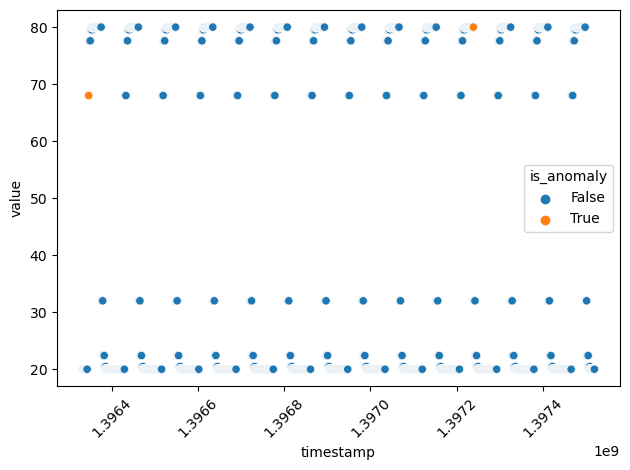

In [149]:
#Visualizing the anomaly cases
sns.scatterplot(data = df_test, x='timestamp', y='value', hue = 'is_anomaly')
plt.xticks(rotation = 45)
plt.tight_layout()

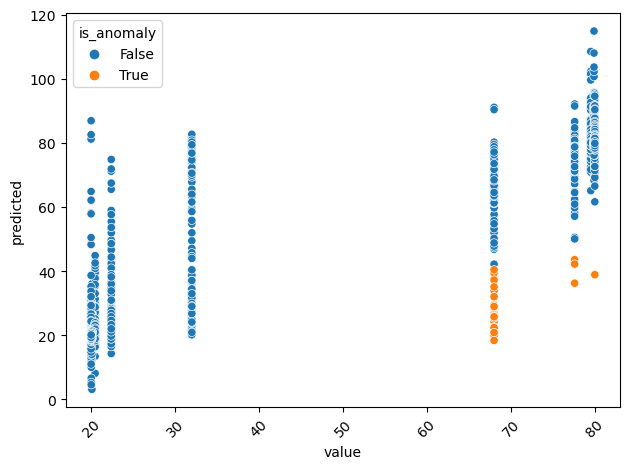

In [152]:
#Visualizing the anomaly cases
sns.scatterplot(data = df_test, x='value', y='predicted', hue = 'is_anomaly')
plt.xticks(rotation = 45)
plt.tight_layout()